Global y-axis limits: 1.9823092035164216 to 3.310863274449802


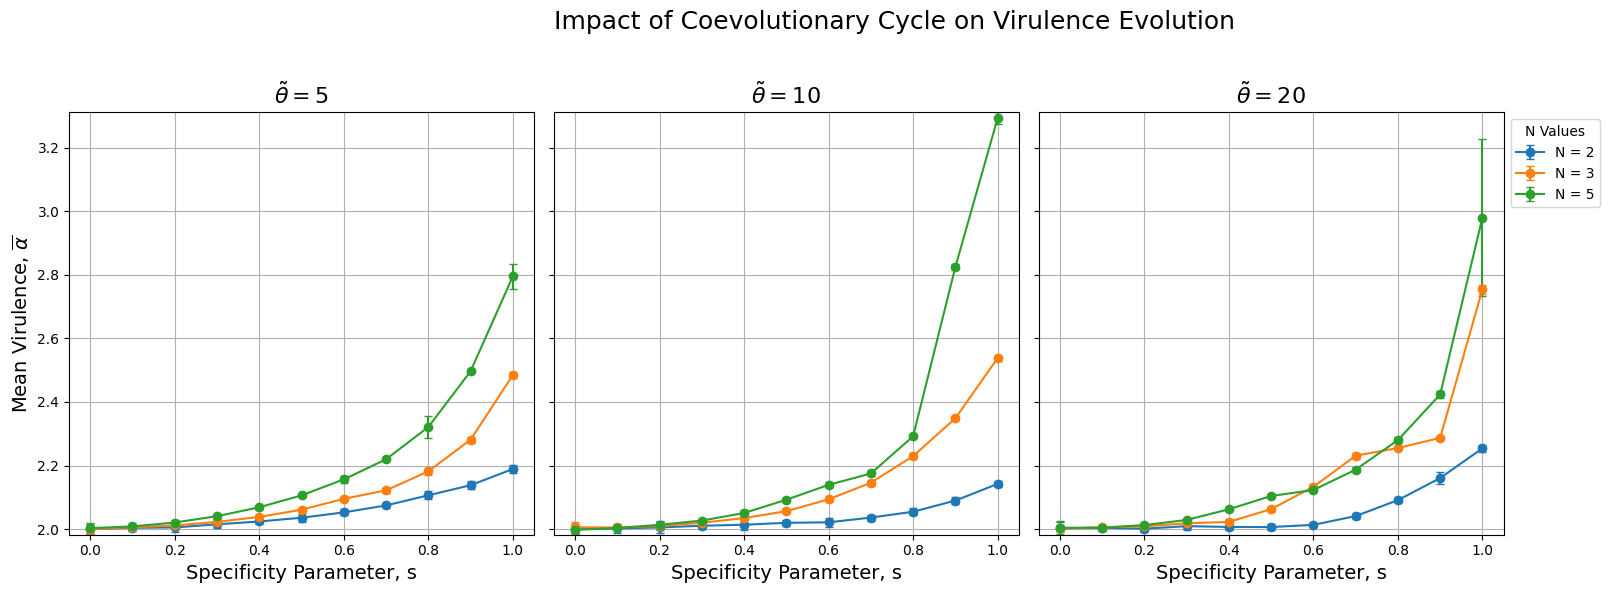

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the parameter values that were used to generate the data.
theta_tilde_values = [5, 10, 20]  # Theta tilde values
N_values = [2, 3, 5]              # N values

# Define s-values range is implicit in the CSV files (grouped by s).

# First, compute global y-axis limits across all files.
global_min = np.inf
global_max = -np.inf

for theta in theta_tilde_values:
    for N in N_values:
        filename = f"specificity_sweep_results_N={N}_theta={theta}.csv"
        if not os.path.exists(filename):
            print(f"File {filename} not found; skipping.")
            continue
        data = pd.read_csv(filename)
        if data.empty:
            continue
        # Group by s and compute mean and standard deviation
        grouped = data.groupby("s")["MeanAlpha"].agg(["mean", "std"]).reset_index()
        # Compute lower and upper error bar values (mean ± 2*std)
        grouped["lower"] = grouped["mean"] - 2 * grouped["std"]
        grouped["upper"] = grouped["mean"] + 2 * grouped["std"]
        local_min = grouped["lower"].min()
        local_max = grouped["upper"].max()
        global_min = min(global_min, local_min)
        global_max = max(global_max, local_max)

print(f"Global y-axis limits: {global_min} to {global_max}")

# Create a figure with 1 row and 3 columns (one for each theta_tilde value),
# with a shared y-axis.
fig, axes = plt.subplots(1, len(theta_tilde_values), figsize=(18, 6), sharey=True)

for ax, theta in zip(axes, theta_tilde_values):
    for N in N_values:
        filename = f"specificity_sweep_results_N={N}_theta={theta}.csv"
        if not os.path.exists(filename):
            print(f"File {filename} not found; skipping.")
            continue
        data = pd.read_csv(filename)
        if data.empty:
            continue
        grouped = data.groupby("s")["MeanAlpha"].agg(["mean", "std"]).reset_index()
        
        ax.errorbar(grouped["s"], grouped["mean"], yerr=2*grouped["std"],
                    marker='o', linestyle='-', capsize=3, label=f"N = {N}")
    ax.set_title(r"$\tilde{\theta} = $" + f"{theta}", fontsize=16)
    ax.set_xlabel("Specificity Parameter, s", fontsize=14)
    ax.grid(True)

axes[0].set_ylabel(r"Mean Virulence, $\overline{\alpha}$", fontsize=14)
plt.ylim(global_min, global_max)
plt.suptitle("Impact of Coevolutionary Cycle on Virulence Evolution", fontsize=18)
plt.legend(title="N Values", loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()
